## Vehicle Manufacturing Analisis and Clustering
Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 25 2024

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [20]:
df = pd.read_csv('C:/Users/abu_s/Desktop/Data/Json/Car Data.csv')

# Visualizations

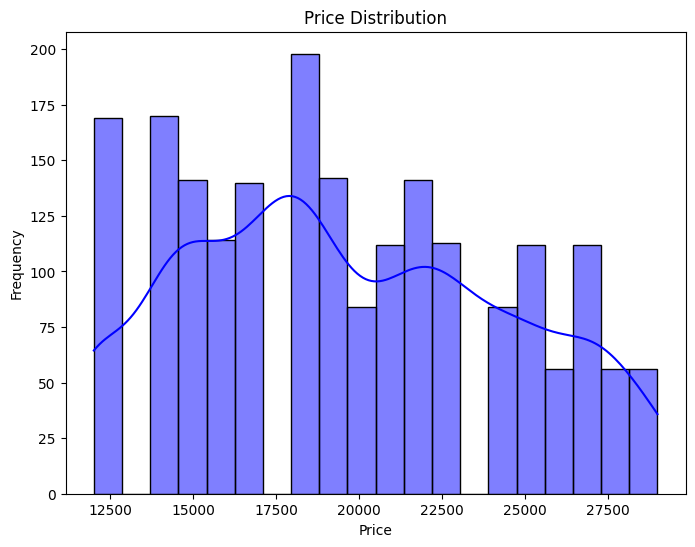

In [22]:
# 1. Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, bins=20, color="blue")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


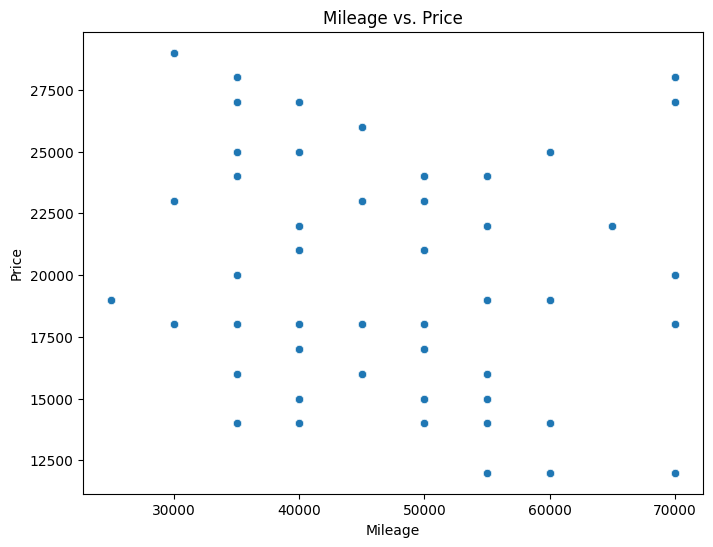

In [23]:
# 2. Mileage vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Mileage'], y=df['Price'])
plt.title("Mileage vs. Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

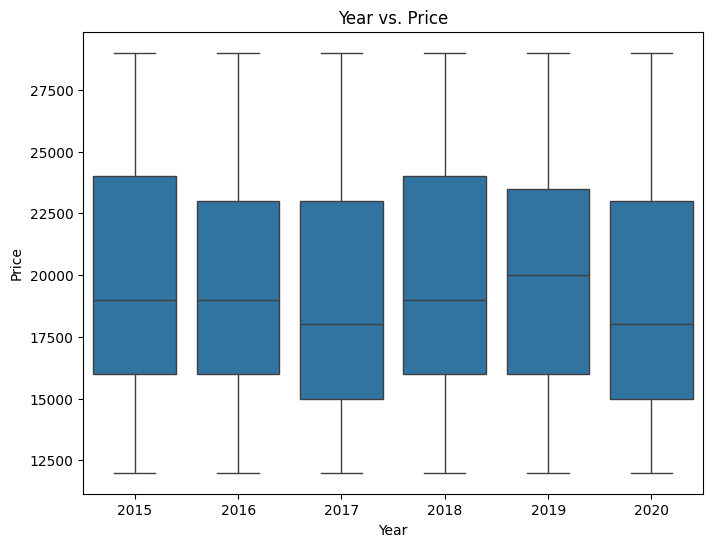

In [24]:
# 3. Year vs. Price
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Year'], y=df['Price'])
plt.title("Year vs. Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

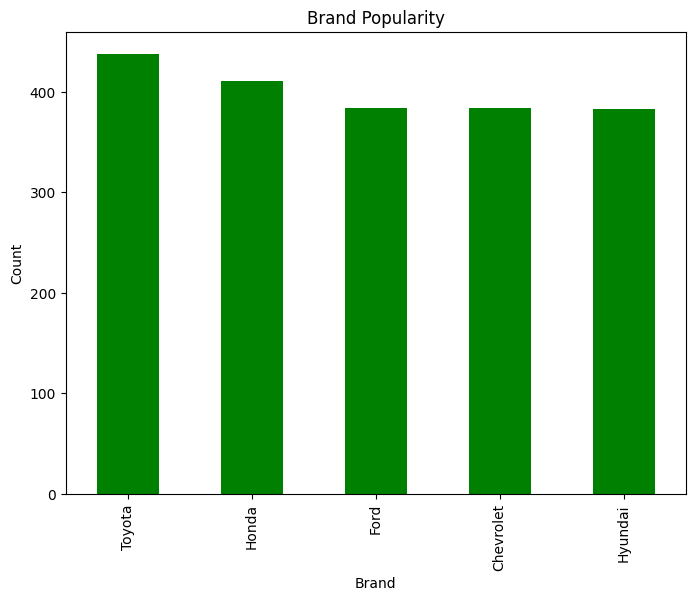

In [25]:
# 4. Brand Popularity
plt.figure(figsize=(8, 6))
df['Brand'].value_counts().plot(kind='bar', color="green")
plt.title("Brand Popularity")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

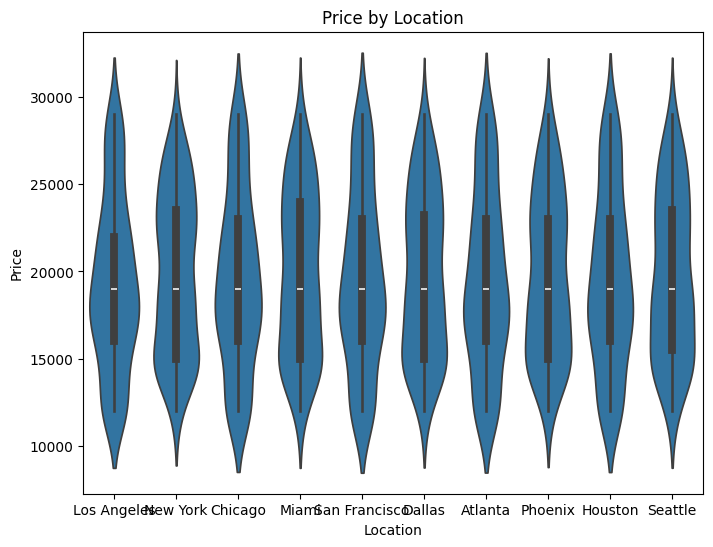

In [26]:
# 5. Price by Location
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Location'], y=df['Price'])
plt.title("Price by Location")
plt.xlabel("Location")
plt.ylabel("Price")
plt.show()

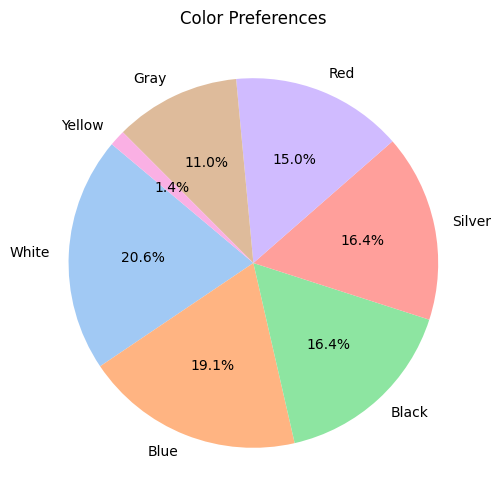

In [27]:
# 6. Color Preferences
plt.figure(figsize=(8, 6))
df['Color'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Color Preferences")
plt.ylabel("")
plt.show()

## Clustering

In [29]:
# Preprocessing for Clustering
numerical_features = ['Year', 'Mileage', 'Price']
categorical_features = ['Brand', 'Color', 'Location']

In [30]:
# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_features])

In [31]:
# Encode categorical features
ohe = OneHotEncoder()
encoded_categorical = ohe.fit_transform(df[categorical_features]).toarray()

In [32]:
# Combine features

X = np.hstack((scaled_numerical, encoded_categorical))


In [33]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [34]:
# Visualize Clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

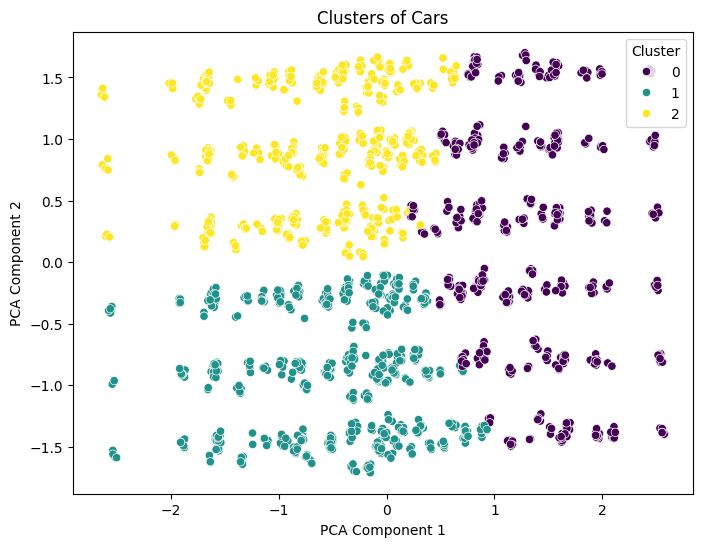

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette="viridis")
plt.title("Clusters of Cars")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [36]:
# Summary of Clustering Results
print(df[['Car ID', 'Brand', 'Model', 'Price', 'Cluster']])

      Car ID      Brand     Model  Price  Cluster
0          1     Toyota     Camry  18000        2
1          2      Honda     Civic  16000        2
2          3       Ford     Focus  14000        1
3          4  Chevrolet     Cruze  12000        1
4          5    Hyundai   Elantra  15000        2
...      ...        ...       ...    ...      ...
1995    1996    Hyundai  Palisade  22000        2
1996    1997     Toyota    Sienna  16000        2
1997    1998      Honda       Fit  14000        2
1998    1999       Ford    Fusion  19000        1
1999    2000  Chevrolet    Malibu  23000        0

[2000 rows x 5 columns]
